# Saving and loading sunpy Maps with FITS

- https://docs.sunpy.org/en/stable/generated/gallery/saving_and_loading_data/genericmap_in_fits.html

In this example we are going to look at how to save and load a
`sunpy.map.GenericMap` as FITS files.

FITS is a modern file format designed to meet the needs of the astronomy
community. It has deep integration with Python, SunPy and Astropy as well as
IDL and many other languages.

Here, even though we will be working with `sunpy.map.sources.sdo.AIAMap`
specifically, the process can be extended to any `sunpy.map.GenericMap`.

In [ ]:
import astropy.units as u

import sunpy.data.sample
import sunpy.map

We begin by creating an `sunpy.map.sources.sdo.AIAMap` object using the
sample data.

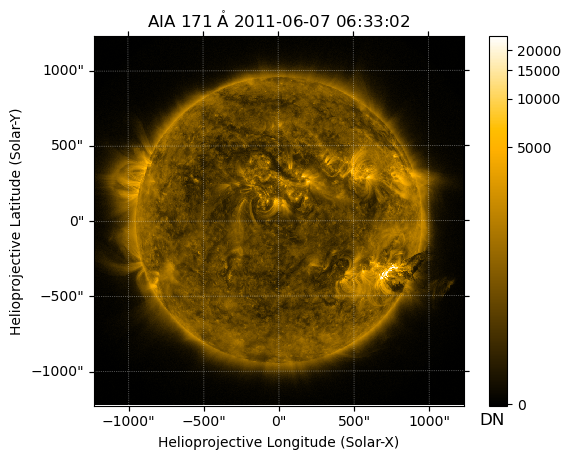

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia_map.peek(clip_interval=(1, 99.99)*u.percent)

We can now save this object to a FITS file to use later. Saving it like this
allows us to preserve all of the metadata of the object along with the actual
array data. When we load the FITS file again, we get an identical
`sunpy.map.sources.sdo.AIAMap` object.

All changes to `sunpy.map.GenericMap` are saved within the FITS file. For example,
if we rotate the image by 45 degrees and then save it to a FITS file, these changes
are reflected in both the image data and metadata when we load the data back in.

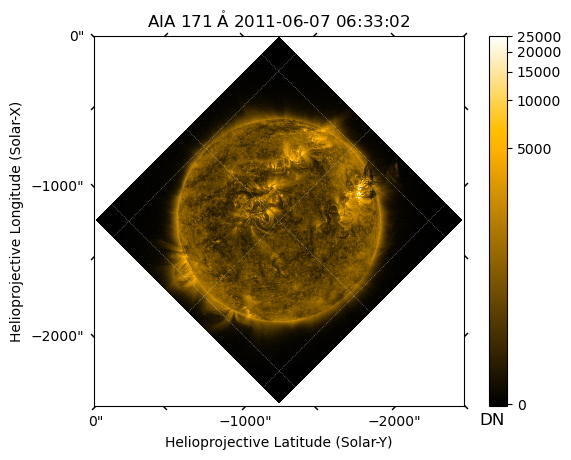

In [ ]:
aia_map = aia_map.rotate(45*u.deg)
aia_map_from_fits.peek(clip_interval=(1, 99.99)*u.percent)

In [ ]:
# Please be aware that if you try to save this twice,
# it will throw an exception rather than overwriting the file.
aia_map.save('aia_map.fits')

This FITS file is portable and can be safely loaded by any FITS reader.
Using `sunpy.map.Map`, we can easily read our rotated image back in:

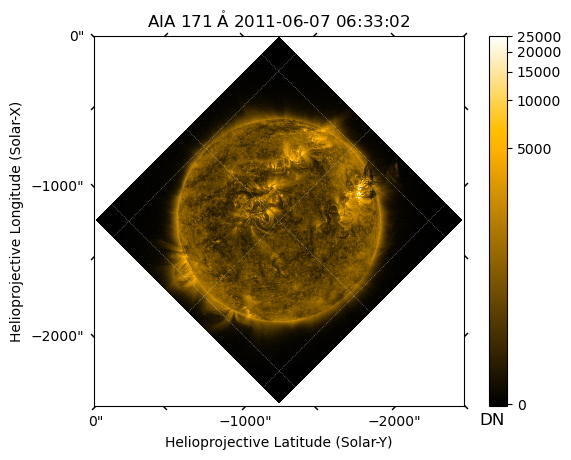

In [ ]:
aia_map_from_fits = sunpy.map.Map('aia_map.fits')
aia_map_from_fits.peek(clip_interval=(1, 99.99)*u.percent)